In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\Suicides in India 2001-2012.csv")
print(df.info())
print(df['Type_code'].unique())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB
None
['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']
State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64


In [3]:
df.replace('A & N Islands (Ut)', 'A & N Islands', inplace=True)
df.replace('Chandigarh (Ut)', 'Chandigarh', inplace=True)
df.replace('D & N Haveli (Ut)', 'D & N Haveli', inplace=True)
df.replace('Daman & Diu (Ut)', 'Daman & Diu', inplace=True)
df.replace('Lakshadweep (Ut)', 'Lakshadweep', inplace=True)
df.replace('Delhi (Ut)', 'Delhi', inplace=True)

df.replace('By Other means (please specify)', 'By Other means', inplace=True) 

df = df.drop(df[(df.State == 'Total (Uts)') | (df.State == 'Total (All India)') | 
               (df.State == 'Total (States)')].index)

In [4]:
df= df.drop(df[df.Total==0].index)

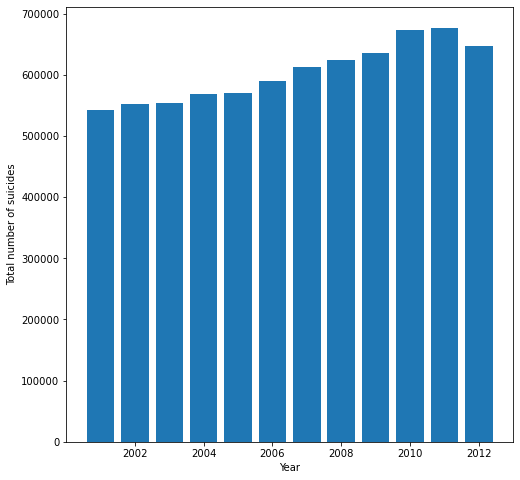

In [5]:
fig=plt.figure() 
year=df['Year'].unique()
year_count=df.groupby('Year').sum()['Total']
plt.bar(year,year_count)
plt.gcf().set_size_inches(8,8)
plt.xlabel("Year")
plt.ylabel("Total number of suicides")
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_year_bargraph.png",format='png')
plt.show()

Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


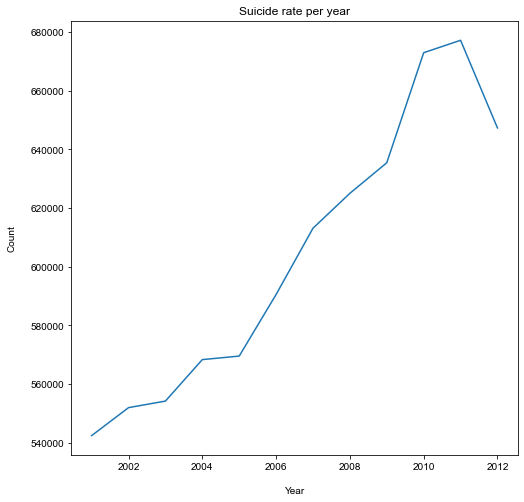

In [6]:
# Suicide rate every year

year_wise = df.groupby('Year').sum()['Total']
print(year_wise)
year_wise.plot(kind='line', figsize=(6,6), title = 'Suicide rate per year')
plt.xlabel('\nYear')
plt.ylabel('Count\n')
sns.set_style('whitegrid')
plt.gcf().set_size_inches(8,8)
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_year_linegraph.png",format='png')
plt.show()

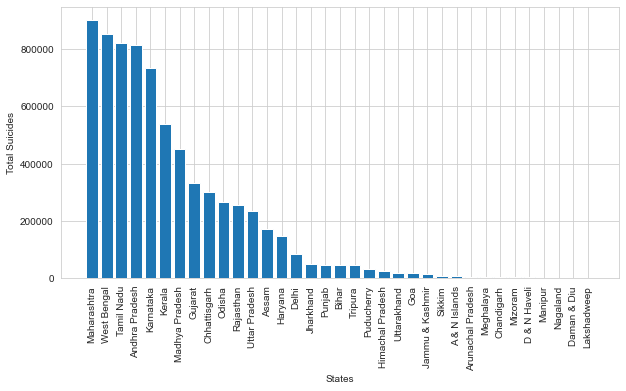

In [7]:
data_per_state = df.groupby('State').sum()['Total'].reset_index().sort_values(by='Total',ascending=False)

data_per_state.style.background_gradient(cmap = 'Blues')
states=[str(i) for i in data_per_state['State']]
state_count=[i for i in data_per_state['Total']]
plt.bar(states,state_count)
plt.gcf().set_size_inches(10,5)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Total Suicides")
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\StatesvsTotalsuicides.png",format='png')
plt.show()


In [8]:
data_per_state[len(data_per_state)-10:].style.background_gradient(cmap = 'Blues')

,State,Total
0,A & N Islands,8109
2,Arunachal Pradesh,6633
22,Meghalaya,5415
5,Chandigarh,5164
23,Mizoram,4154
7,D & N Haveli,3430
21,Manipur,2102
24,Nagaland,1728
8,Daman & Diu,1391
18,Lakshadweep,50


In [9]:
def plot_type(type):
    suicide_type_data=df[df['Type_code']==type]
    data=suicide_type_data.groupby('Type').sum()['Total']
    data=data.sort_values(ascending=False)
    plt.bar([i for i in data.keys()],[i for i in data])
    plt.gcf().set_size_inches(10,5)
    plt.xticks(rotation=90)
    plt.xlabel("Suicide by "+type)
    plt.ylabel("Total Suicides")
    #plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Suicide by "+type+".png",format='png')
    plt.show()

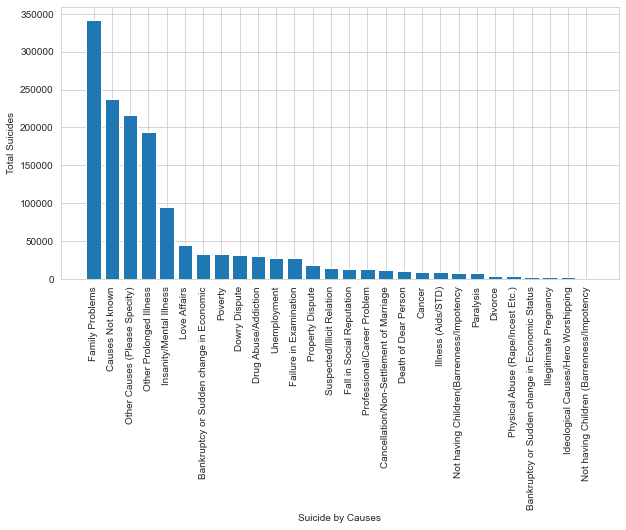

In [10]:
plot_type('Causes')

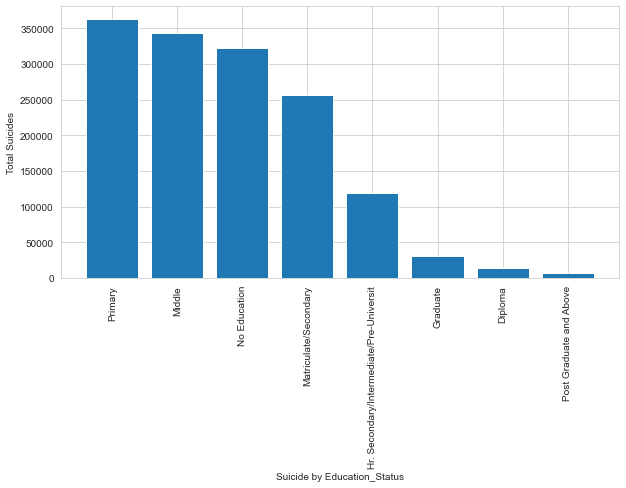

In [11]:
plot_type('Education_Status')

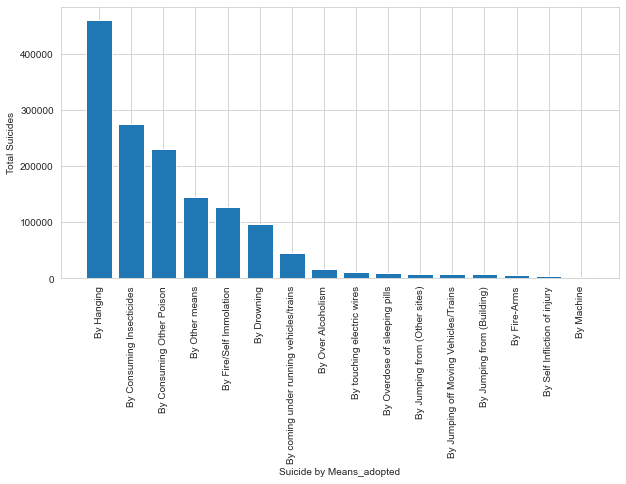

In [12]:
plot_type('Means_adopted')

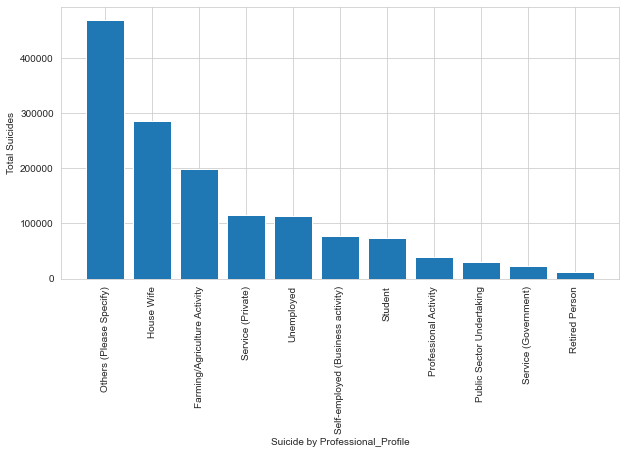

In [13]:
plot_type('Professional_Profile')

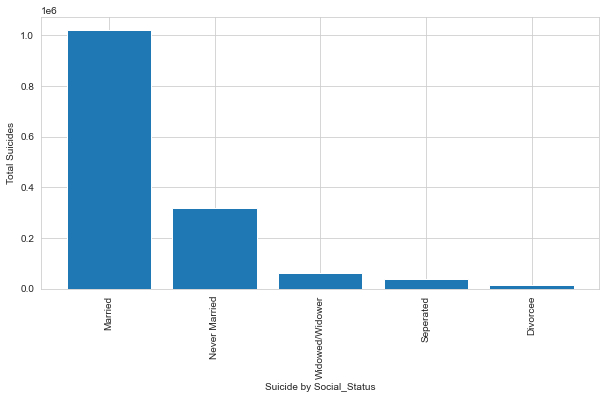

In [14]:
plot_type('Social_Status')

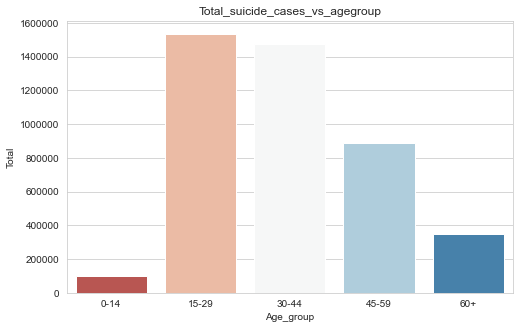

In [15]:
#...........................AGE.............................. 



plt.figure(figsize=(12,6))
data =df[df['Age_group']!='0-100+']
data = data.groupby(['Age_group'],as_index=False).sum()
sns.barplot(x='Age_group',y='Total',data=data,palette='RdBu')
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(8,5)
plt.title("Total_suicide_cases_vs_agegroup")
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_age_group.png",format='png')
plt.show()

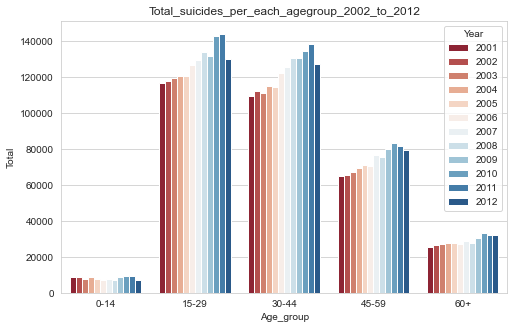

In [16]:
data =df[df['Age_group']!='0-100+']
data = data.groupby(['Age_group','Year'],as_index=False).sum()
sns.barplot(x='Age_group',y='Total',hue='Year',data=data,palette='RdBu')
plt.gcf().set_size_inches(8,5)
plt.title("Total_suicides_per_each_agegroup_2002_to_2012")
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_year_agegroup.png",format='png')
plt.show()

   Gender    Total
0  Female  2606922
1    Male  4641088


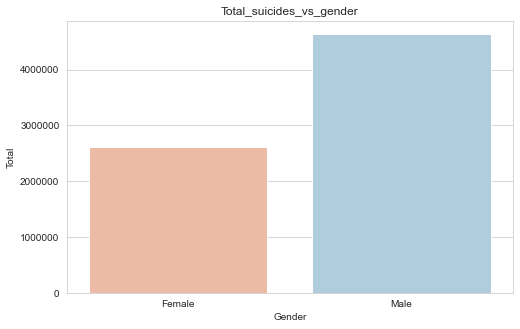

In [17]:

data = df[['Gender','Total']]
data = data.groupby(['Gender'],as_index=False).sum()
print(data)
sns.barplot(x='Gender',y='Total',data=data,palette='RdBu')
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(8,5)
plt.title("Total_suicides_vs_gender")
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_gender.png",format='png')
plt.show()


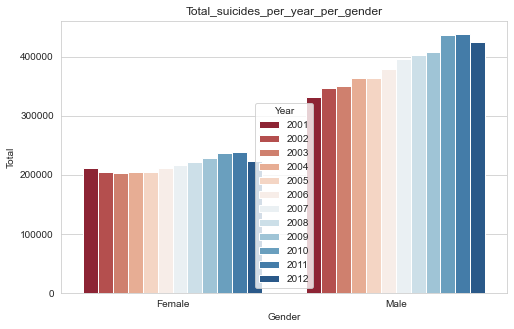

In [18]:
data = df[['Gender','Total','Year']]
data = data.groupby(['Gender','Year'],as_index=False).sum()
sns.barplot(x='Gender',y='Total',hue='Year',data=data,palette='RdBu')
plt.gcf().set_size_inches(8,5)
plt.title("Total_suicides_per_year_per_gender")
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_year_and_gender.png",format='png')
plt.show()

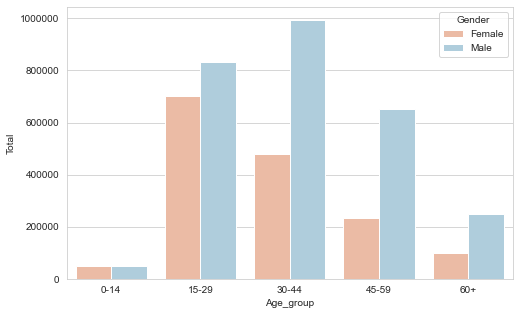

In [19]:
plt.figure(figsize=(12,6))
data = df[df['Age_group']!='0-100+']
data = data.groupby(['Age_group','Gender'],as_index=False).sum()
sns.barplot(x='Age_group',y='Total',hue='Gender',data=data,palette='RdBu')
plt.ticklabel_format(style='plain',axis='y')
plt.gcf().set_size_inches(8,5)
#plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_agegroup_and_gender.png",format='png')
plt.show()

In [20]:
def plot_type(type):
    suicide_type_data=df[df['Type_code']==type]
    suicide_type_data=suicide_type_data[['Type','Gender','Total']]
    data=suicide_type_data.groupby(['Type','Gender'],as_index=False).sum().sort_values(by='Total')
    sns.barplot(x='Type',y='Total',hue='Gender',data=data,palette='RdBu')
    plt.ticklabel_format(style='plain',axis='y')
    plt.gcf().set_size_inches(8,5)
    plt.xticks(rotation=90)
    plt.xlabel(type)
    #plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_gender_"+type+".png",format='png')
    plt.show()
    #data=data.sort_values(ascending=False)
    

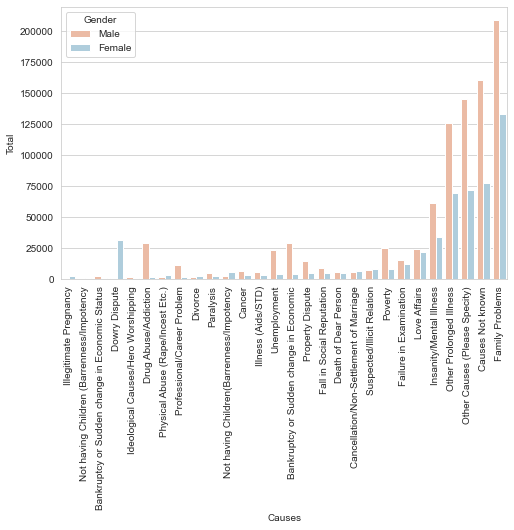

In [21]:
plot_type('Causes')


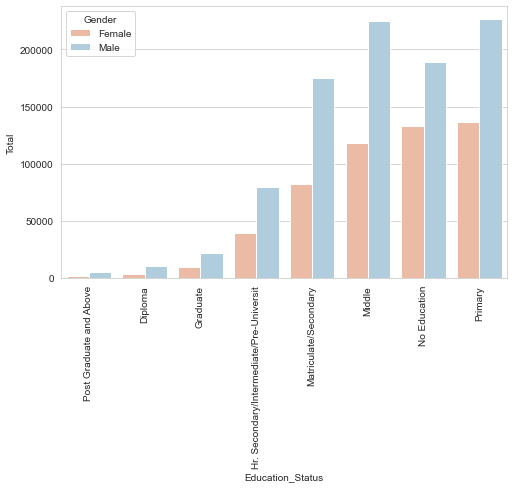

In [22]:
plot_type('Education_Status')

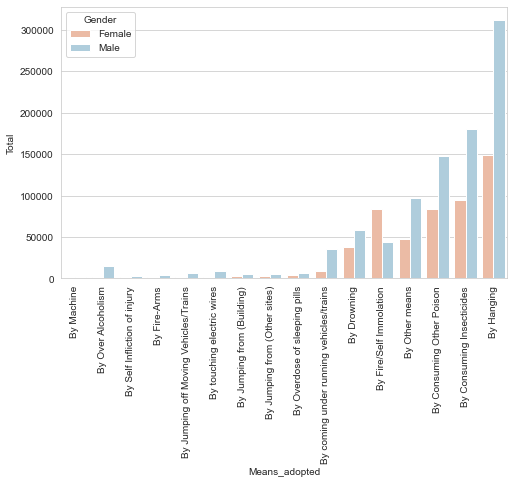

In [23]:
plot_type('Means_adopted')

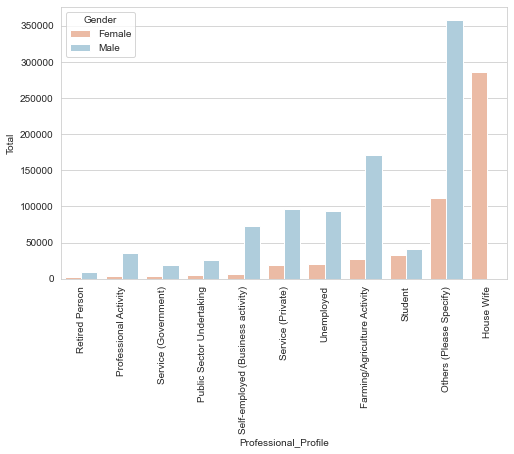

In [24]:
plot_type('Professional_Profile')

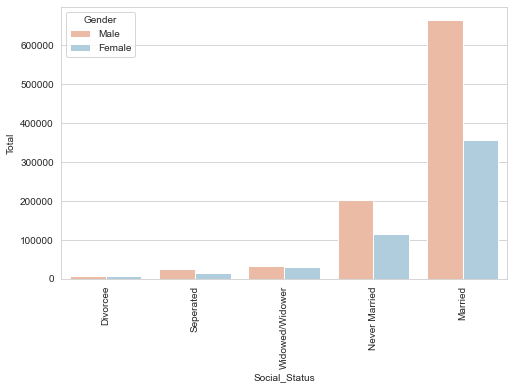

In [25]:
plot_type('Social_Status')


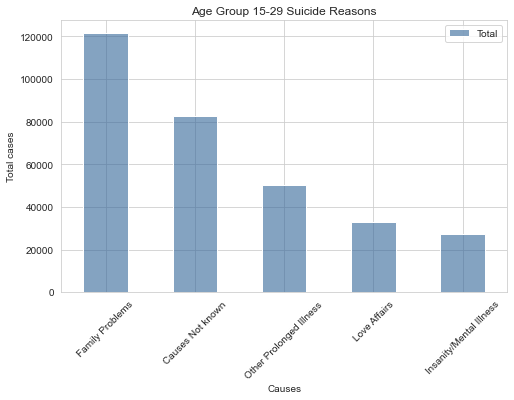

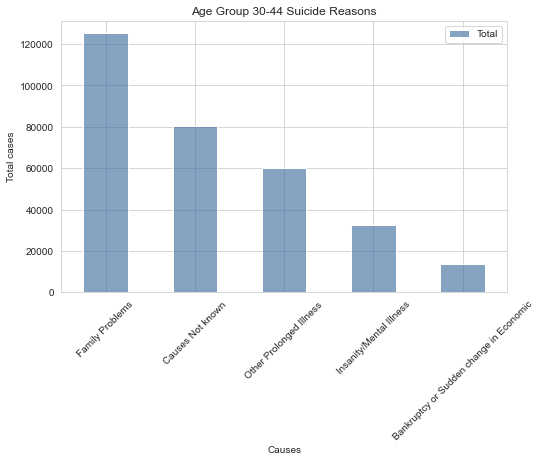

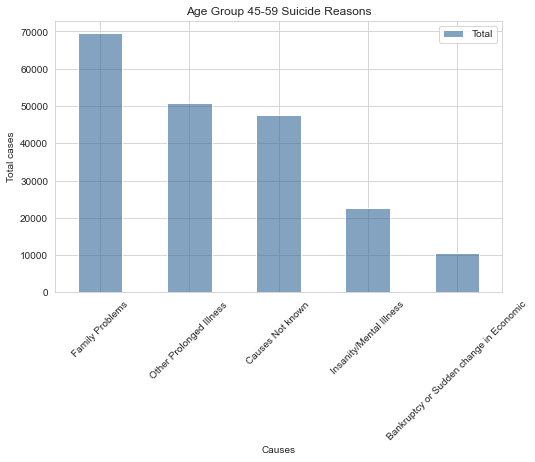

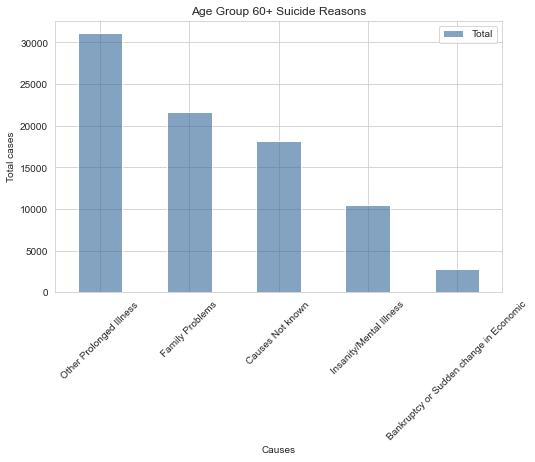

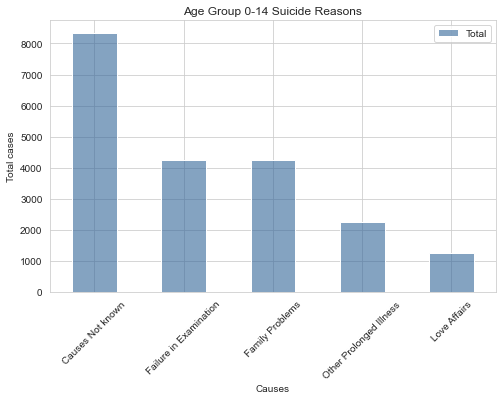

In [26]:
causes = df[df['Type_code'] == 'Causes']
causes=causes[causes.Type!='Unknown']
causes= causes.sort_values(by='Total',ascending=False)
df1 = causes[['Type','Age_group','Total']]
age_grp = causes['Age_group'].value_counts().index
age_grp = list(age_grp)
for x in age_grp:
    df1=df1[df1['Type']!='Other Causes (Please Specity)']
    group_set = df1[df1['Age_group'] == x ]
    group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)
    group_set = group_set.head(5)
    group_set.plot(kind = 'bar', figsize = (15,5), title = 'Age Group '+x+ ' Suicide Reasons',\
                   color=(0.2, 0.4, 0.6, 0.6))
    plt.gcf().set_size_inches(8,5)
    plt.xticks(rotation=45)
    plt.xlabel('Causes')
    plt.ylabel('Total cases')
    #plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_suicide_reason_age_"+x+".png",format='png')
    plt.show()

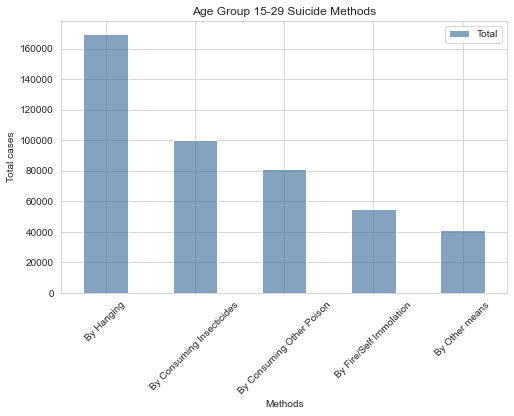

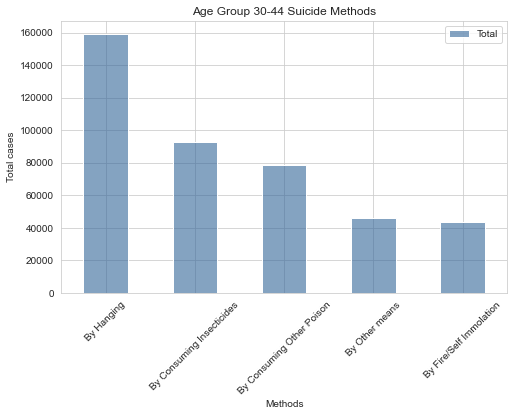

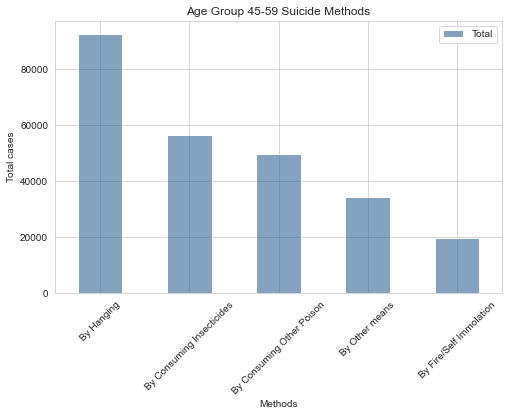

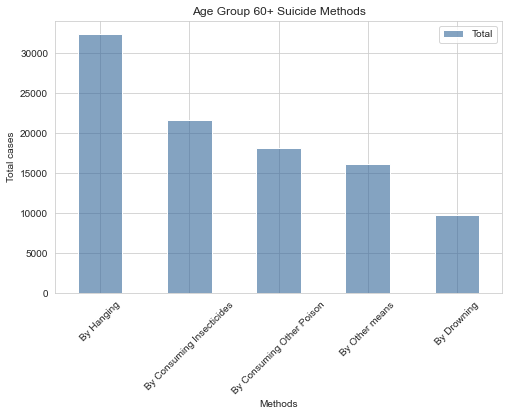

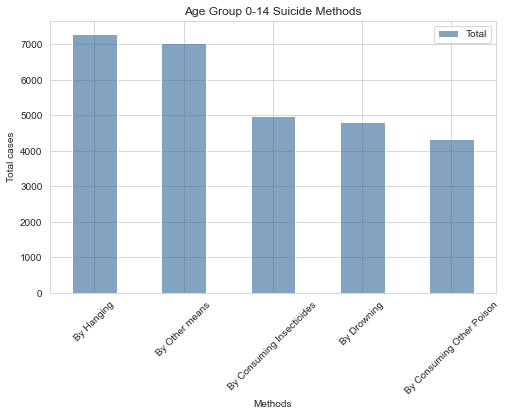

In [27]:
age_set = df[df['Type_code']=='Means_adopted'][['Type','Age_group','Total']]
age_grp = df[df['Type_code']=='Means_adopted']['Age_group'].value_counts().index
age_grp = list(age_grp)
for x in age_grp:
    group_set = age_set[age_set['Age_group'] == x ]
    group_set =group_set.groupby('Type').sum().sort_values('Total', ascending = False)
    group_set = group_set.head(5)
    group_set.plot(kind = 'bar', figsize = (15,5), title = 'Age Group '+x+ ' Suicide Methods',\
                   color=(0.2, 0.4, 0.6, 0.6))
    plt.gcf().set_size_inches(8,5)
    plt.xticks(rotation=45)
    plt.xlabel('Methods')
    plt.ylabel('Total cases')
    #plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_suicide_method_age_"+x+".png",format='png')
    plt.show() 

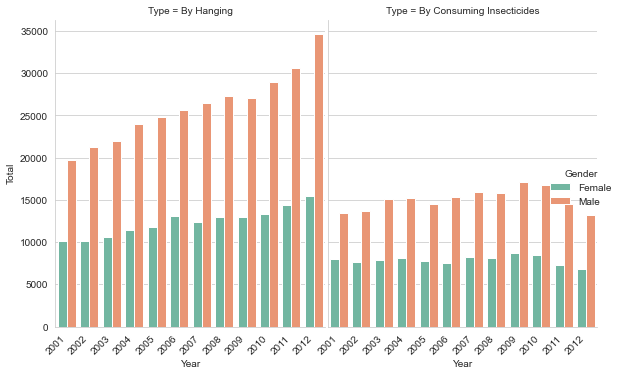

In [28]:
suicide_by_hanging_insecticde= df[(df.Type=='By Hanging') | (df.Type=='By Consuming Insecticides')]
plot = sns.catplot(x='Year', y='Total',  hue="Gender", col="Type",kind='bar',\
                      data=suicide_by_hanging_insecticde, estimator=sum, palette=sns.color_palette("Set2"), height=6, aspect=3,ci=None)
plot.set_xticklabels(rotation=45, horizontalalignment='right');
plt.gcf().set_size_inches(8,5)
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_by_Hanging_and_Insecticides.png",format='png')
plt.show()

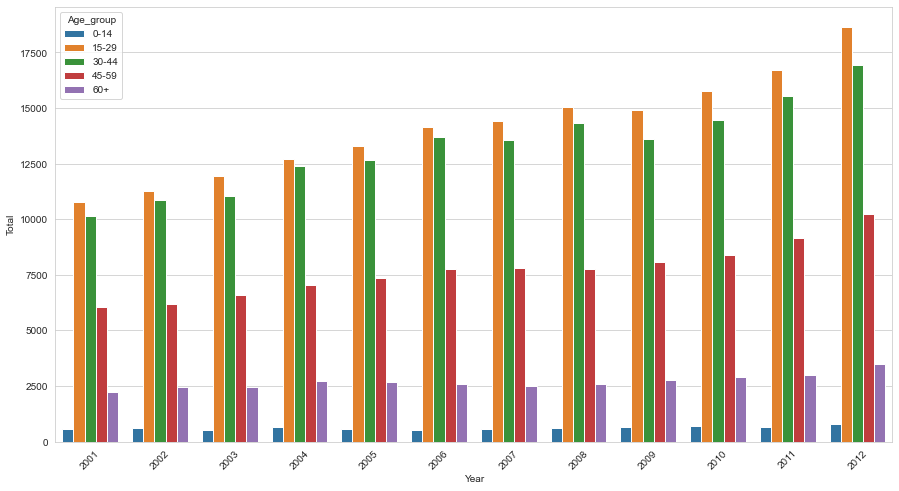

In [99]:
suicide_by_hanging= df[(df.Type=='By Hanging')].sort_values('Age_group')
sns.barplot(x='Year', y='Total',  hue="Age_group", data=suicide_by_hanging,estimator=sum,ci=None)
plt.xticks(rotation=45);
plt.gcf().set_size_inches(15,8)
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_age_group_ByHanging.png",format='png')
plt.show()

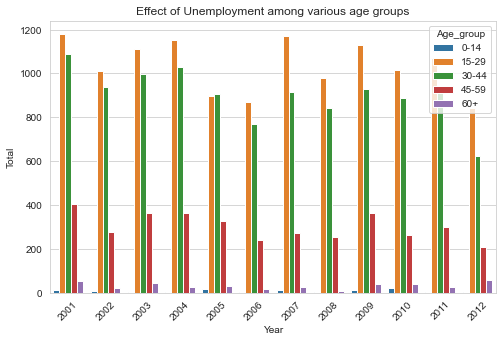

In [30]:
suicide_by_hanging= df[(df.Type=='Unemployment')].sort_values('Age_group')
sns.barplot(x='Year', y='Total',  hue="Age_group", data=suicide_by_hanging,estimator=sum,ci=None)
plt.xticks(rotation=45);
plt.gcf().set_size_inches(8,5)
plt.title("Effect of Unemployment among various age groups")
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_age_group_Unemployment.png",format='png')
plt.show()

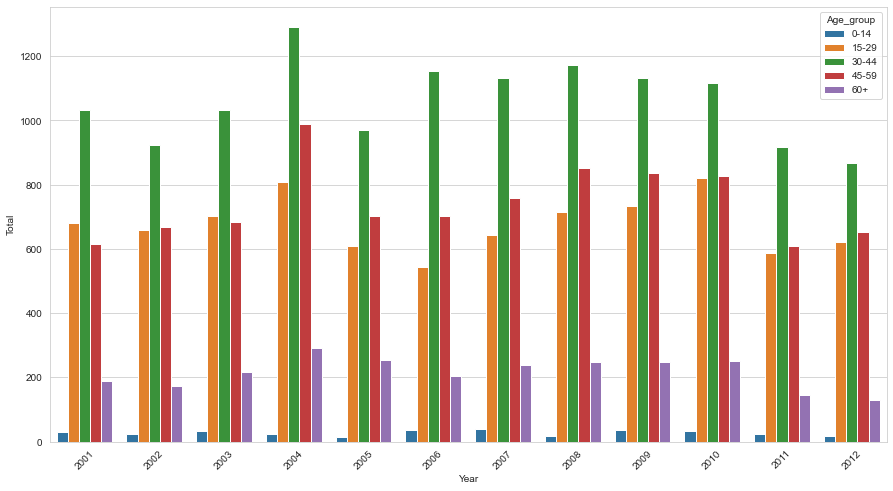

In [97]:
suicide_by_hanging= df[(df.Type=='Poverty')].sort_values('Age_group')
sns.barplot(x='Year', y='Total',  hue="Age_group", data=suicide_by_hanging,estimator=sum,ci=None)
plt.xticks(rotation=45);
plt.gcf().set_size_inches(15,8)
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_age_group_Poverty.png",format='png')
plt.show()

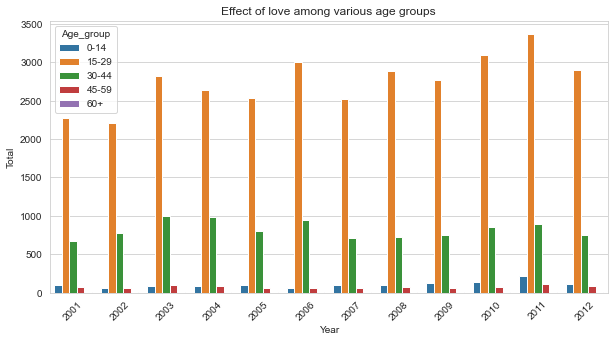

In [34]:
suicide_by_hanging= df[(df.Type=='Love Affairs')].sort_values('Age_group')
sns.barplot(x='Year', y='Total',  hue="Age_group", data=suicide_by_hanging,estimator=sum,ci=None)
plt.xticks(rotation=45);
plt.gcf().set_size_inches(10,5)
plt.title("Effect of love among various age groups")
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_age_group_Love_Affairs.png",format='png')
plt.show()

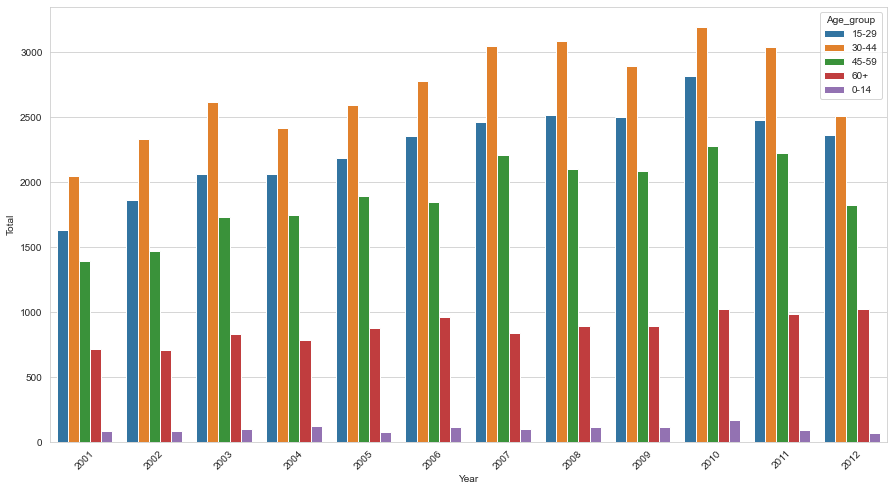

In [93]:
suicide_by_hanging= df[(df.Type=='Insanity/Mental Illness')]
sns.barplot(x='Year', y='Total',  hue="Age_group", data=suicide_by_hanging,estimator=sum,ci=None)
plt.xticks(rotation=45);
plt.gcf().set_size_inches(15,8)
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_age_group_Mental_Illness.png",format='png')
plt.show()

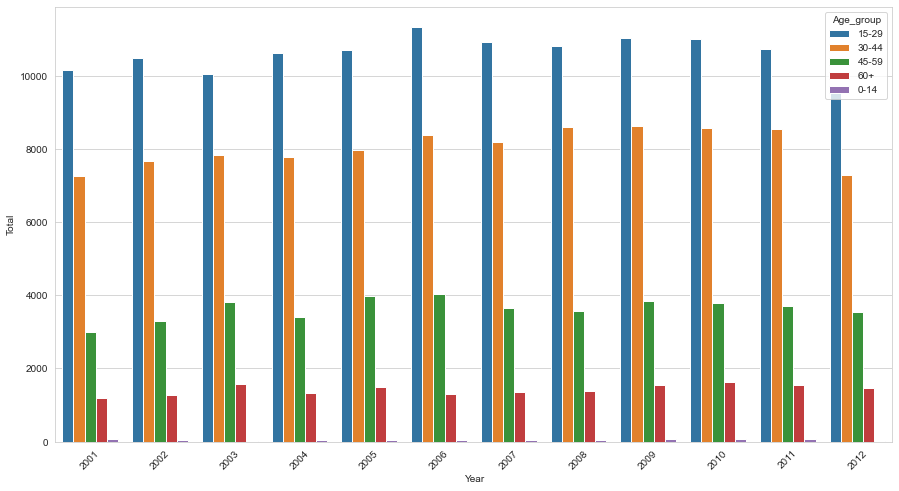

In [94]:
suicide_by_hanging= df[(df.Type=='House Wife')]
sns.barplot(x='Year', y='Total',  hue="Age_group", data=suicide_by_hanging,estimator=sum,ci=None)
plt.xticks(rotation=45);
plt.gcf().set_size_inches(15,8)
plt.savefig(r"C:\Users\Prahlad\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Python 3.8\Final Project\static\Total_suicides_per_age_group_HouseWife.png",format='png')
plt.show()

In [44]:
# ....................LINEAR REGRESSION..............................
def linear_regression_coeff(x,y):
    number_of_observation=np.size(x)
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    xy_sd=np.sum(np.array([i-x_mean for i in x])*np.array([i-y_mean for i in y]))
    xx_sd=np.sum(np.array([i-x_mean for i in x])*np.array([i-x_mean for i in x]))
    m=xy_sd/xx_sd 
    c=y_mean-m*x_mean 
    print("Regression Coeff "+str(m)+"  c value: "+str(c))
    return m,c 

def linear_regression_plotting(x,y,m,c,catogry):
    plt.scatter(x,y,marker='.')
    predicted_y=c+m*x
    plt.xlabel(catogry[0])
    plt.ylabel(catogry[1])
    plt.title(catogry[0]+" vs "+catogry[1])
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.gcf().set_size_inches(8, 8)
    plt.plot(x,predicted_y,color='red')
    #plt.savefig("./static/"+catogry[0]+" vs "+catogry[1]+".png",format='png')
    plt.show()

In [66]:
# ...........................................Polynomial Regression ...................................
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def polynomial_regression_graph(x,y,catogry):
    poly=PolynomialFeatures(degree=2)
    x_poly=poly.fit_transform(x.reshape(-1,1))
    poly_model=LinearRegression()
    poly_model.fit(x_poly,y.reshape(-1,1))
    y_pred=poly_model.predict(x_poly)
    plt.scatter(x,y)
    plt.xlabel(catogry[0])
    plt.ylabel(catogry[1])
    plt.title(catogry[0]+" vs "+catogry[1])
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.gcf().set_size_inches(8, 5)
    plt.plot(x,y_pred,c='red')
    #plt.savefig("./static/"+catogry[0]+" vs "+catogry[1]+".png",format='png')
    plt.show()

# calculating r2 score
def r_score(x,y):
    poly=np.poly1d(np.polyfit(x,y,4))
    return (r2_score(y,poly(x)))

# function to predict the dependent value 
def multiple_regression_predict(x,y,value):
    poly=np.poly1d(np.polyfit(x,y,4))
    return(poly(value))

In [78]:
total_cases_per_year_by_hanging=df[df['Type']=='By Hanging'][['Year','Total']].groupby('Year').sum()
print(total_cases_per_year_by_hanging)
total_cases_per_year=df[['Year','Total']].groupby('Year').sum()
print(total_cases_per_year)

      Total
Year       
2001  29757
2002  31385
2003  32571
2004  35499
2005  36559
2006  38706
2007  38861
2008  40268
2009  40006
2010  42266
2011  45015
2012  50062
       Total
Year        
2001  542440
2002  551980
2003  554218
2004  568349
2005  569545
2006  590543
2007  613119
2008  625014
2009  635429
2010  672926
2011  677159
2012  647288


[29757 31385 32571 35499 36559 38706 38861 40268 40006 42266 45015 50062]
Regression Coeff 7.279576749602251  c value: 324371.05828225793


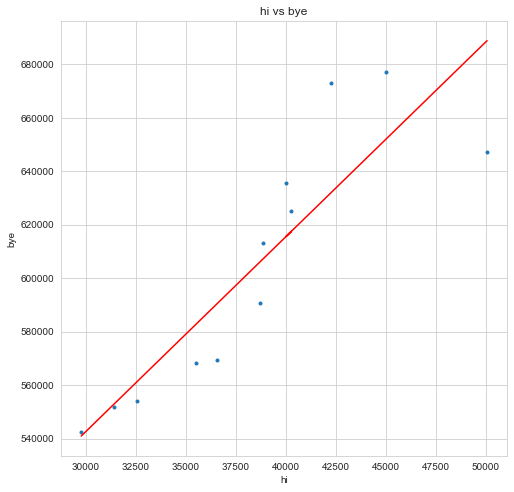

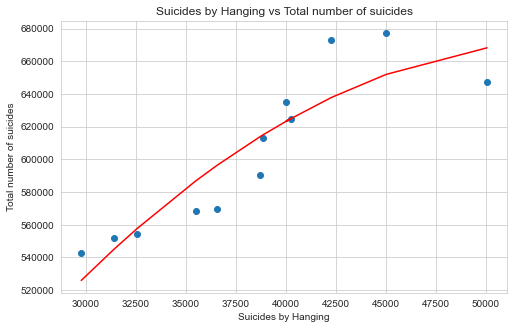

0.964989136212823


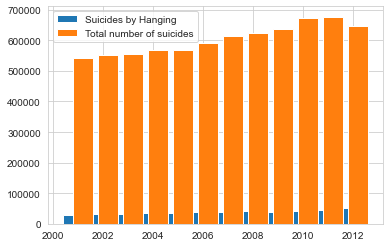

In [81]:
data1=total_cases_per_year_by_hanging['Total'].values
print(data1)
data2=total_cases_per_year['Total'].values
m,c=linear_regression_coeff(data1,data2)
linear_regression_plotting(data1,data2,m,c,['hi','bye'])
polynomial_regression_graph(data1,data2,['Suicides by Hanging','Total number of suicides'])
print(r_score(data1,data2))
plt.bar(df['Year'].unique()-0.2,data1)
plt.bar(df['Year'].unique()+0.2,data2)
plt.legend(['Suicides by Hanging','Total number of suicides'])
plt.show()

In [89]:
total_cases_per_year_farming=df[df['Type']=='By Hanging'][['Year','Total']].groupby('Year').sum()
print(total_cases_per_year_farming)
total_cases_per_year_by_insecticides=df[df['Type']=='By Consuming Insecticides'][['Year','Total']].groupby('Year').sum()
print(total_cases_per_year_by_insecticides)

      Total
Year       
2001  29757
2002  31385
2003  32571
2004  35499
2005  36559
2006  38706
2007  38861
2008  40268
2009  40006
2010  42266
2011  45015
2012  50062
      Total
Year       
2001  21530
2002  21414
2003  23001
2004  23311
2005  22316
2006  22947
2007  24125
2008  23895
2009  25941
2010  25288
2011  21804
2012  19929


[29757 31385 32571 35499 36559 38706 38861 40268 40006 42266 45015 50062]
Regression Coeff -0.11843035814221911  c value: 41131.89017487829


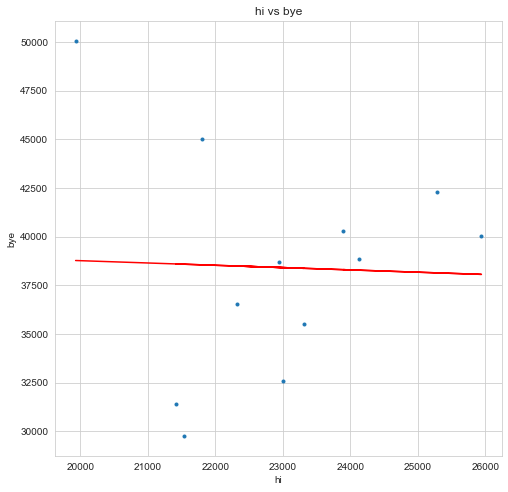

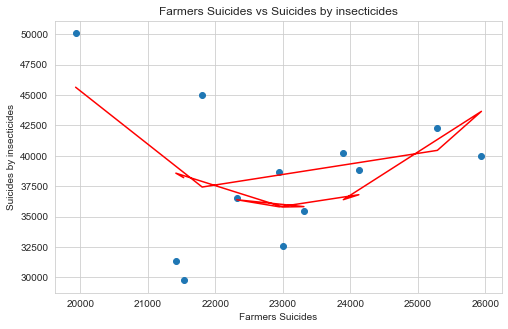

0.5119557380988946


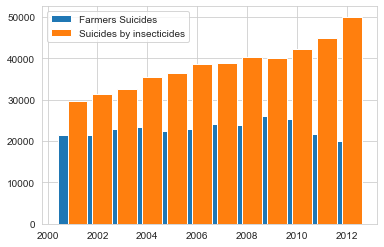

In [91]:
data2=total_cases_per_year_farming['Total'].values
print(data1)
data1=total_cases_per_year_by_insecticides['Total'].values
m,c=linear_regression_coeff(data1,data2)
linear_regression_plotting(data1,data2,m,c,['hi','bye'])
polynomial_regression_graph(data1,data2,['Farmers Suicides','Suicides by insecticides'])
print(r_score(data1,data2))
plt.bar(df['Year'].unique()-0.2,data1)
plt.bar(df['Year'].unique()+0.2,data2)
plt.legend(['Farmers Suicides','Suicides by insecticides'])
plt.show()